## 3.0 Explore Data

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import final_project.utils.paths as path # Si no corro pip install -- editable . En Conda previo a esto no puedo importar mis scripts
import final_project.visualization.visualize as vis 
import janitor
import pandas as pd

### Read Data

In [15]:
processed_covid_file = path.data_processed_dir("time_series_covid19_confirmed_global_processed.csv")

In [16]:
processed_covid_df = pd.read_csv(processed_covid_file)
processed_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216976 entries, 0 to 216975
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   country_region  216976 non-null  object
 1   date            216976 non-null  object
 2   value           216976 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 5.0+ MB


In [17]:
processed_covid_df.head()

,country_region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


### Explore Data

In [18]:
processed_covid_df = (
    processed_covid_df
    .transform_column(
        "date",
        pd.to_datetime
    )
) # Transformo la columna data a formato datetime

In [19]:
countries = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
some_latam_countries_df = processed_covid_df.filter_on(f"country_region in {countries}")
some_latam_countries_df.head(3) # Filtro los paises que me interesan visaulizar

,country_region,date,value
7,Argentina,2020-01-22,0
31,Brazil,2020-01-22,0
58,Chile,2020-01-22,0


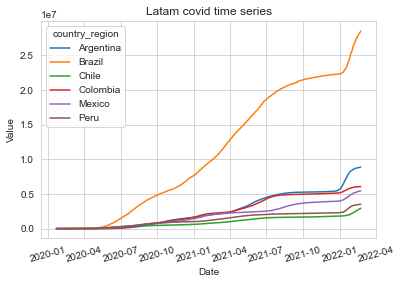

In [20]:
vis.visualization(some_latam_countries_df) # Esta es la forma de hacerlo de manera profesional

In [21]:
top_countries_df = (
    processed_covid_df
    .select_columns(["country_region", "value"]) # Selecciono las columnas de mi dataset
    .groupby(["country_region"]) # Las agrupo por region
    .aggregate("sum") # Sumo los valores agrupados
    .sort_values("value", ascending=False) # Ordeno de forma descendiente
    .reset_index() # Reseteo el indice
    .head(20) # Muestro los primeros 20
    .transform_column(
        column_name="country_region",
        function=lambda x: "red" if x in countries else "lightblue",
        dest_column_name="color"
    ) # Creo una columna calculada con .transform_column donde llamara rojo a los paises dentro de mi lista countries y celeste a los que no lo estén
)

top_countries_df.head()

,country_region,value,color
0,US,18811473383,lightblue
1,India,12445466512,lightblue
2,Brazil,8453174166,red
3,United Kingdom,3312009244,lightblue
4,France,3297111297,lightblue


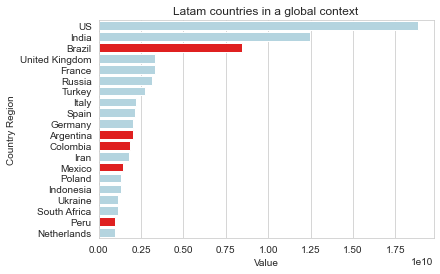

In [22]:
vis.visualization_color(top_countries_df)